<a href="https://colab.research.google.com/github/eloizalencar/ICD/blob/main/MONITORAMENTODESR(trabalho1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Bibliotecas para o estudo
import pandas as pd # estrutura de dados
import matplotlib.pyplot as plt # análise por gráficos
import seaborn as sns # análise por gráficos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Grafico de comparação de pessoas infectadas por doença respiratorias por zona durante 2020 até 2023.

In [ ]:
path = "/content/drive/MyDrive/datasets/INFLUD20-01-05-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA'] )

df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199937 entries, 0 to 1199936
Data columns (total 1 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   CS_ZONA  1072436 non-null  float64
dtypes: float64(1)
memory usage: 9.2 MB


In [ ]:
path = "/content/drive/MyDrive/datasets/INFLUD21-01-05-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA'] 
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731290 entries, 0 to 1731289
Data columns (total 1 columns):
 #   Column   Dtype  
---  ------   -----  
 0   CS_ZONA  float64
dtypes: float64(1)
memory usage: 13.2 MB


In [ ]:
path = "/content/drive/MyDrive/datasets/INFLUD22-03-04-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA'] 
)
df.info() # uso de memória 51.4 MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CS_ZONA  500489 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [ ]:
path = "/content/drive/MyDrive/datasets/INFLUD23-03-04-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA'] # IMPORTANTE: ler só a coluna TP_COR_RACA
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61489 entries, 0 to 61488
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CS_ZONA  56006 non-null  float64
dtypes: float64(1)
memory usage: 480.5 KB


In [ ]:
#IGNORANDO A LINHA 9
df = df[df["CS_ZONA"]!=9]

In [ ]:
df_temp = df['CS_ZONA'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
 1: "Urbana" ,
2: "Rural",
3: "Periurbana",
9: "Ignorado",

})
df_temp

Urbana        0.943151
Rural         0.045355
Periurbana    0.011494
Name: CS_ZONA, dtype: float64

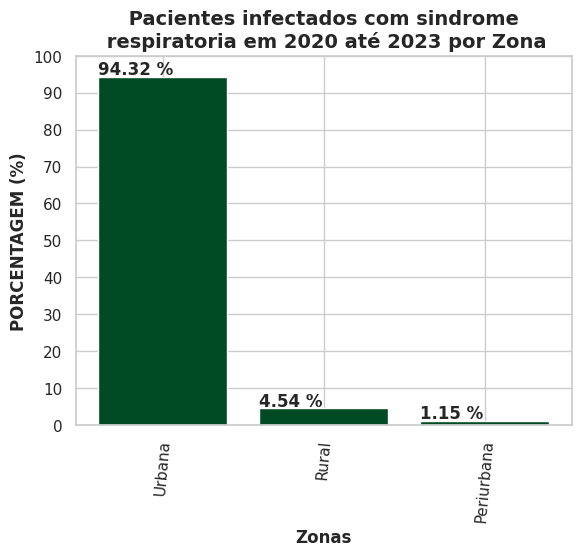

In [ ]:
x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar (x, heights,
    color=len(df_temp)*["#004b23"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    " Pacientes infectados com sindrome \n respiratoria em 2020 até 2023 por Zona", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                     # Fonte em negrito

)

## Rótulo do eixo horizontal
plt.xlabel(
    "Zonas",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i-1) * 0.1 for i in range(1, int(10*max(df_temp.values)+3))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, CS_ZONA in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[CS_ZONA] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[CS_ZONA]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

Prescrição: Foi concluido por meio do grafico que a população da zona urbana durante os 4 anos analisados foi a que mais teve pessoas infectadas por doenças respiratorias.
A zona urbana é onde há alta taxa de poluição e da população brasileira, é preciso reforçar a pratica de sustentabilidade, pois a poluição do ar tambem influencia muito na facilidade de se contrair doenças respiratorias. 

Evolução do paciente por zona durante os 4 anos

In [ ]:
path = "/content/drive/MyDrive/datasets/INFLUD20-01-05-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA', 'EVOLUCAO'] )

df.info() # uso de memória 51.4 MB
path = "/content/drive/MyDrive/datasets/INFLUD22-03-04-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA', "EVOLUCAO"] 
)
df.info() # uso de memória 51.4 MB

path = "/content/drive/MyDrive/datasets/INFLUD22-03-04-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA', 'EVOLUCAO'] 
)
df.info() # uso de memória 51.4 MB

path = "/content/drive/MyDrive/datasets/INFLUD21-01-05-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['CS_ZONA', "EVOLUCAO"] 
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199937 entries, 0 to 1199936
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   CS_ZONA   1072436 non-null  float64
 1   EVOLUCAO  1116299 non-null  float64
dtypes: float64(2)
memory usage: 18.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CS_ZONA   500489 non-null  float64
 1   EVOLUCAO  502174 non-null  float64
dtypes: float64(2)
memory usage: 8.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CS_ZONA   500489 non-null  float64
 1   EVOLUCAO  502174 non-null  float64
dtypes: float64(2)
memory usage: 8.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731290 entri

In [ ]:
#IGNORANDO A LINHA 9
df = df[df["CS_ZONA"]!=9]

In [ ]:
df['EVOLUCAO'] = df['EVOLUCAO'].map({1:"Cura", 2: "Óbito",  3: "Óbito por outras causas",})

df_temp = df['CS_ZONA'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
 1: "Urbana" ,
2: "Rural",
3: "Periurbana",
9: "Ignorado",

})
df_temp

Urbana        0.940186
Rural         0.055250
Periurbana    0.004564
Name: CS_ZONA, dtype: float64

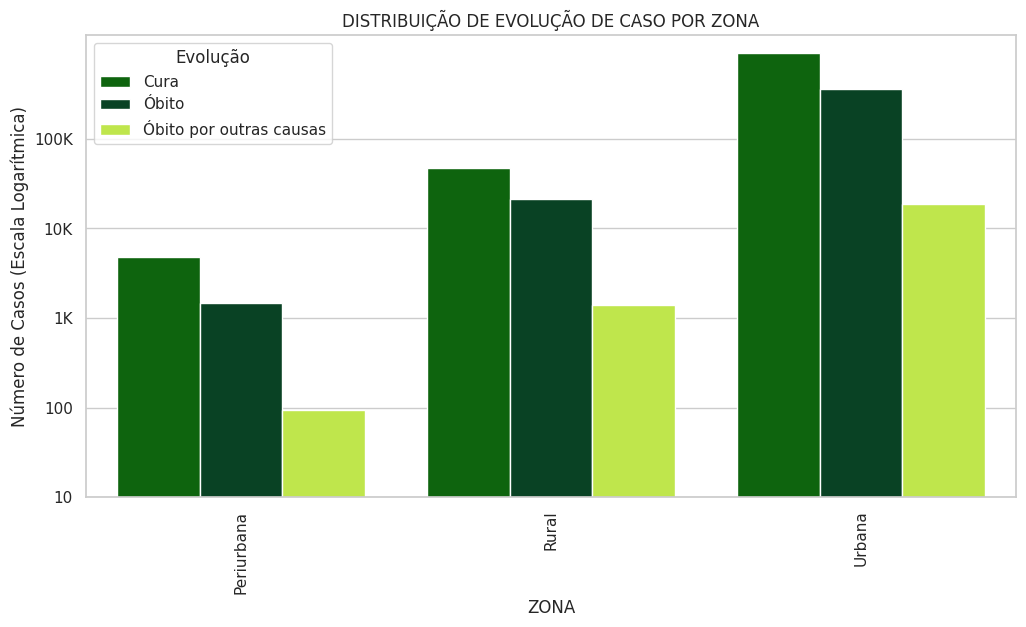

In [ ]:
# Substituir os valores na coluna 'SUPORT_VEN' pelo mapeamento desejado
df['CS_ZONA'] = df['CS_ZONA'].replace({
    1.0: "Urbana",
    2.0: "Rural",
    3.0: "Periurbana",
    9.0: "Ignorado"
})

# Contagem de ocorrências de cada valor de EVOLUCAO por SUPORT_VEN
counts = df.groupby(['CS_ZONA', 'EVOLUCAO']).size().reset_index(name='counts')

# Criar um gráfico de barras empilhadas com cores personalizadas
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
colors = ["#007200", "#004b23", "#ccff33"]  # Cores personalizadas
ax = sns.barplot(data=counts, x='CS_ZONA', y='counts', hue='EVOLUCAO', palette=colors)

# Personalizar o gráfico
plt.title('DISTRIBUIÇÃO DE EVOLUÇÃO DE CASO POR ZONA')
plt.xlabel('ZONA')
plt.ylabel('Número de Casos (Escala Logarítmica)')
plt.yscale('log')
plt.legend(title='Evolução')
plt.xticks(rotation=90)

# Definir intervalos personalizados para os valores do eixo y (opcional)
yticks = [10, 100, 1000, 10000, 100000]
yticklabels = ['10', '100', '1K', '10K', '100K']
plt.yticks(yticks, yticklabels)

# Mostrar o gráfico
plt.show()


 Foi feita a analise de dados dos 4 anos e foi possível concluir que a maior parte da população se curou, mas ainda a porcentagem de obito é alta nas 3 zonas. É preciso que o governo analise quais são as formas de cuidados medicos, as condinções dos postos medicos e hospitais para descobrir o porque da porcentagem de obitos por sindromes respiratorias ainda estão tão elavadas.

# Pacientes que foram vacinados na ultima campanha em 2023:

In [ ]:
path = "/content/drive/MyDrive/datasets/INFLUD23-03-04-2023.csv"

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['VACINA'] # IMPORTANTE: ler só a coluna TP_COR_RACA
)

In [ ]:
#IGNORANDO A LINHA 9
df = df[df["VACINA"]!=9]

In [ ]:
df_temp = df['VACINA'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    1 : 'Sim',
2 : 'Não',
9 : 'Ignorado'
})
df_temp

Não    0.734786
Sim    0.265214
Name: VACINA, dtype: float64

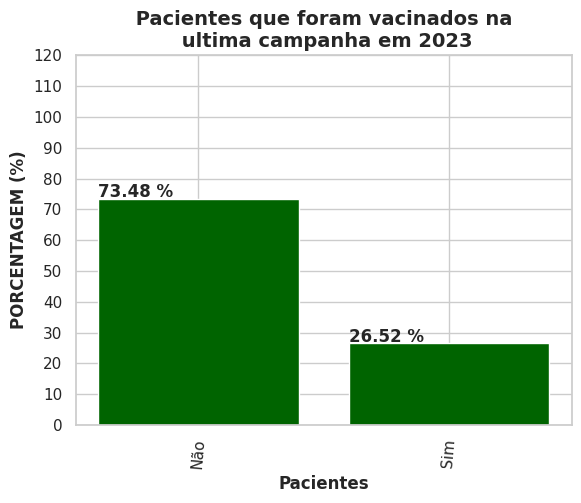

In [ ]:
x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar (x, heights,
    color=len(df_temp)*["#006400"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    " Pacientes que foram vacinados na \n ultima campanha em 2023", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                     # Fonte em negrito

)

## Rótulo do eixo horizontal
plt.xlabel(
    "Pacientes",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i-1) * 0.1 for i in range(1, int(10*max(df_temp.values)+7))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, VACINA in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[VACINA] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[VACINA]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

Prescrição: é notável que á  porcentagem da população brasileira que não foram vacinados é muito discrepante em relação aos não que foram vacinados no ano de 2023. É necessário que haja uma conscientização forte sobre o uso da vacina, pois no ano que a primeira vacina aplicada no Brasil completa 119 anos é o ano que mais da metade da população não se vacinou.
É preciso reforçar a importancia dentro das escolas, nas ruas, nos meios de comunicação e etc.



# Pacientes que foram vacinados na ultima campanha de 2023 e sua classficação final em relação as doenças respiratorias de acordo com idade.

In [ ]:
path = '/content/drive/MyDrive/datasets/INFLUD23-03-04-2023.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=[  
        "NU_IDADE_N","VACINA",
'CLASSI_FIN']
)
df.info() # 462.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61489 entries, 0 to 61488
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_IDADE_N  61489 non-null  int64  
 1   VACINA      32404 non-null  float64
 2   CLASSI_FIN  50331 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.4 MB


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = df.dropna()

In [ ]:
df = df[df["VACINA"] != 9]

In [ ]:
df['VACINA'] = df['VACINA'].map({1:"Sim", 2: "Não"})
df['CLASSI_FIN'] = df['CLASSI_FIN'].map({
    1: "SRAG por influenza",
    2: "SRAG por outro vírus respiratório",
    3: "SRAG por outro agente etiológico",
    4: "SRAG não especificado",
    5: "SRAG por COVID-19"
})

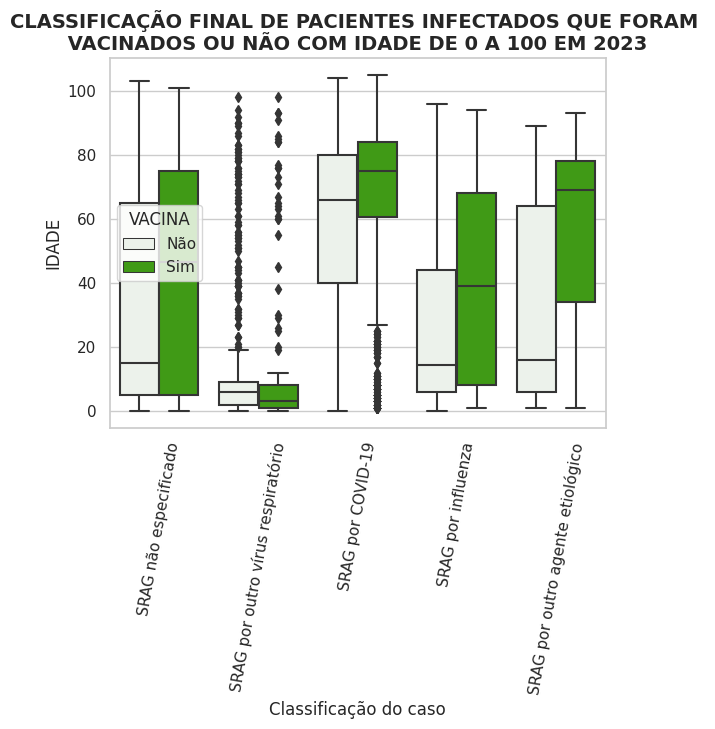

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

sns.boxplot(x="CLASSI_FIN", y="NU_IDADE_N", hue="VACINA", data=df, color= "#38b000")

plt.ylabel("IDADE")
plt.xlabel("Classificação do caso")
plt.title("CLASSIFICAÇÃO FINAL DE PACIENTES INFECTADOS QUE FORAM \n VACINADOS OU NÃO COM IDADE DE 0 A 100 EM 2023 ", fontweight="bold", fontsize=14)
plt.xticks(rotation=80)
plt.show()

Prescrição: Ao analisar o 1 primeiro gráfico de vacinados ou não em 2023 é percepitivel que a maior parte da população não se vacinou e em relação a isso foi criado um outro grafico com as seguintes variaveis: Idade, vacina e classificação final.  Pacientes com idade de 0 até quase 80 anos que foram vacinados tiveram alguam SRAG não especificado, já os pacientes de SRAG por outro virus respiratorio os pacientes não vacinados e os vacinados com até 20 anos tiverem o virus, porem acima dessa idade não tiveram.
Pacientes que foram vacinados pela vacina do covid-19 com faixa etaria acima de 40 anos tiveram bem menos pessoas infectadas em relação aos nãos vacinados.
*SRAG por influenza: Os pacientes que tomaram a vacina tiveram bem mais infectados do que os não vacinados. 
SRAG por outro agente: Os pacientes não vacinados foram mais infectados em uma faixa etaria bem maior do que a dos vacinados.

# Pacientes que foram vacinados pela vacina covid-19 em 2023

In [ ]:
path = '/content/drive/MyDrive/datasets/INFLUD23-03-04-2023.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=[  "VACINA_COV"
        ]
)
df.info() # 462.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61489 entries, 0 to 61488
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VACINA_COV  61453 non-null  float64
dtypes: float64(1)
memory usage: 480.5 KB


In [ ]:
#IGNORANDO A LINHA 9
df = df[df["VACINA_COV"]!=9]

In [ ]:
df_temp = df['VACINA_COV'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    1 : 'Sim',
2 : 'Não',
9 : 'Ignorado'
})
df_temp

Sim    0.562852
Não    0.437148
Name: VACINA_COV, dtype: float64

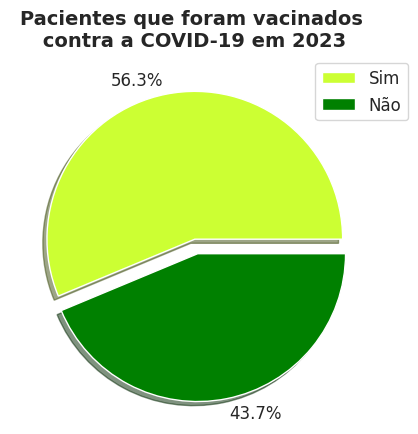

In [ ]:
# Fazer gráfico completo de pizza de paciente que foram internados nos anos de 2020 e 2023 
## Valores (x) para o gráfico
x = df_temp.values

## Criando o gráfico com mais propriedades
plt.pie(x,                                            # Valores
    labels=["{:.1f}%".format(100*x[0]),               # Rótulo do 1º setor
            "{:.1f}%".format(100*x[1])],              # Rótulo do 2º setor
    colors=["#ccff33", "#008000"],                    # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
        "Pacientes que foram vacinados \n contra a COVID-19 em 2023 ", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    df_temp.index,                                     # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)
## Mostrando o gráfico
plt.show()

Prescrição: É notavel ao analisar o grafico de 2023 que mesmo depois de 2 anos que a vacina do covid-19 foi liberada para vacinação praticamente a metade dos individuos brasileiros ainda não foram vacinados.
Algumas das medidas que o governo pode tomar é programas de incentivo, onde o governo pode implementar programas de incentivo, como certificados de vacinação que permitam acesso a determinados locais ou benefícios adicionais, para motivar as pessoas a se vacinarem.


# Estados que mais tiveram casos e internações em 2021





Estados com mais casos

In [ ]:
#CARREGANDO OS DADOS DE 2021
path = '/content/drive/MyDrive/datasets/INFLUD21-01-05-2023.csv'

df = pd.read_csv(
    path,
    encoding='iso-8859-1',
    sep=';',
   usecols=["SG_UF"]
)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731290 entries, 0 to 1731289
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   SG_UF   object
dtypes: object(1)
memory usage: 13.2+ MB


In [ ]:
df_temp = df['SG_UF'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    
    "RO": "Rondônia" ,
    "AC":"Acre" ,
    "AM":"Amazonas "	,
    "RR":"Roraima",
    "PA":"Pará",
    "AP":"Amapá ",
    "TO":"Tocantins",
    "MA":"Maranhão",
    "PI":"Piauí",
    "CE":"Ceará",
    "RN":"Rio Grande do Norte", 
    "PB":"Paraíba" ,
    "PE":"Pernambuco",
    "AL":	"lagoas" ,
	  "SE":"Sergipe",
    "BA":"Bahia",
    "MG":"Minas Gerais",
    "ES":"Espírito Santo",
    "RJ":"Rio de Janeiro",
    "SP":"São Paulo",
    "PR":"Paraná",
    "SC":"Santa Catarina",
    "RS":"Rio Grande do Sul",
    "MS":"Mato Grosso do Sul",
    "MT":"Mato Grosso",
    "GO":"Goiás",
    "DF":"Distrito Federal"

})
df_temp

São Paulo              0.284156
Minas Gerais           0.120689
Rio de Janeiro         0.083217
Paraná                 0.078495
Rio Grande do Sul      0.058553
Ceará                  0.041181
Santa Catarina         0.038994
Goiás                  0.037212
Bahia                  0.036895
Pernambuco             0.033960
Pará                   0.022768
Mato Grosso do Sul     0.018052
Distrito Federal       0.018031
Paraíba                0.015431
Mato Grosso            0.015210
Amazonas               0.014936
Maranhão               0.012249
lagoas                 0.011471
Sergipe                0.010052
Rio Grande do Norte    0.009311
Piauí                  0.008829
Rondônia               0.008472
Tocantins              0.007759
Espírito Santo         0.007215
Amapá                  0.002518
Acre                   0.002239
Roraima                0.002103
Name: SG_UF, dtype: float64

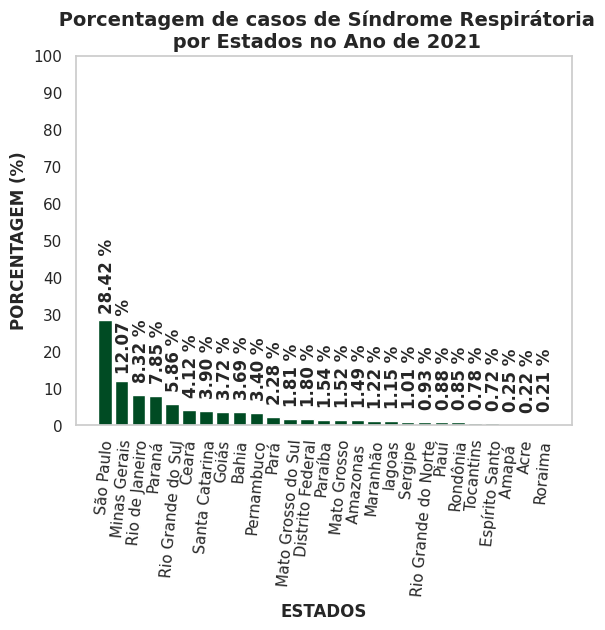

In [ ]:
# Fazer gráfico completo de barras de Casos de sindrome respiratoria aguda grave por estado entre 2020 e2023

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#004b23"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
     " Porcentagem de casos de Síndrome Respirátoria\n por Estados no Ano de 2021",   # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "ESTADOS",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i-1) * 0.1 for i in range(1, int(10*max(df_temp.values)+10))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, SG_UF in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[SG_UF] + 0.12,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[SG_UF]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

#tirando as grades do grafico
    plt.grid(visible=False)


# Mostrando o gráfico
plt.show()

Prescrição: Em 2021 o Estado de São Paulo foi o que conteve mais casos de covid-19, em segundo Minas Gerais e terceiro Rio de Janeiro. Porém, São Paulo teve uma porcentagem discrepante em relação ao Rio de Janeiro e Minas Gerais, pois levando em conta que é o Estado mais populoso do Brasil e que contem o indice de Estado com a maior poluição do ar.
O governo pode tomar algumas medidas para diminuir os indices de casos entre eles o rastreamento de contatos para que possa reforçar o rastreamento de contatos para identificar pessoas que estiveram em contato próximo com casos confirmados e orientá-las sobre o isolamento e a necessidade de realizar testes e também a fiscalização e aplicação de medidas para que possa tambem reforçar a fiscalização, afim de garantir o cumprimento das medidas preventivas, como o uso de máscaras e o cumprimento das restrições impostas, e aplicar medidas punitivas quando necessário.

Estados que tiveram o maior indice de internação

In [ ]:
#CARREGANDO OS DADOS DE 2021
path = '/content/drive/MyDrive/datasets/INFLUD21-01-05-2023.csv'

df = pd.read_csv(
    path,
    encoding='iso-8859-1',
    sep=';',
   usecols=["SG_UF_INTE"]
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731290 entries, 0 to 1731289
Data columns (total 1 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   SG_UF_INTE  object
dtypes: object(1)
memory usage: 13.2+ MB


In [ ]:
df_temp = df['SG_UF_INTE'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    
    "RO": "Rondônia" ,
    "AC":"Acre" ,
    "AM":"Amazonas "	,
    "RR":"Roraima",
    "PA":"Pará",
    "AP":"Amapá ",
    "TO":"Tocantins",
    "MA":"Maranhão",
    "PI":"Piauí",
    "CE":"Ceará",
    "RN":"Rio Grande do Norte", 
    "PB":"Paraíba" ,
    "PE":"Pernambuco",
    "AL":	"lagoas" ,
	  "SE":"Sergipe",
    "BA":"Bahia",
    "MG":"Minas Gerais",
    "ES":"Espírito Santo",
    "RJ":"Rio de Janeiro",
    "SP":"São Paulo",
    "PR":"Paraná",
    "SC":"Santa Catarina",
    "RS":"Rio Grande do Sul",
    "MS":"Mato Grosso do Sul",
    "MT":"Mato Grosso",
    "GO":"Goiás",
    "DF":"Distrito Federal"

})
df_temp

São Paulo              0.286047
Minas Gerais           0.120624
Rio de Janeiro         0.082333
Paraná                 0.078894
Rio Grande do Sul      0.058734
Ceará                  0.040853
Santa Catarina         0.039343
Bahia                  0.036645
Goiás                  0.036077
Pernambuco             0.033242
Pará                   0.022272
Distrito Federal       0.019904
Mato Grosso do Sul     0.017951
Paraíba                0.015514
Mato Grosso            0.015004
Amazonas               0.014534
Maranhão               0.011719
lagoas                 0.011449
Sergipe                0.010199
Rio Grande do Norte    0.009339
Piauí                  0.009184
Rondônia               0.008326
Tocantins              0.007853
Espírito Santo         0.007124
Amapá                  0.002505
Acre                   0.002247
Roraima                0.002084
Name: SG_UF_INTE, dtype: float64

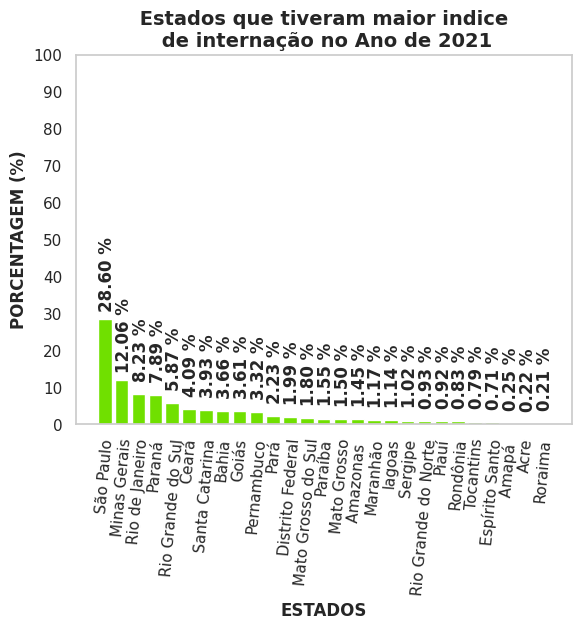

In [ ]:
# Fazer gráfico completo de barras de Casos de sindrome respiratoria aguda grave por estado entre 2020 e2023

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#70e000"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
     " Estados que tiveram maior indice \n de internação no Ano de 2021",   # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "ESTADOS",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i-1) * 0.1 for i in range(1, int(10*max(df_temp.values)+10))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, SG_UF in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[SG_UF] + 0.12,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[SG_UF]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

#tirando as grades do grafico
    plt.grid(visible=False)


# Mostrando o gráfico
plt.show()

Prescrição: Como analisado no primeiro grafico dos estados que mais teve caso de doenças respiratorias, o estado que mais teve caso foi São Paulo e é de se esperar que foi o que mais teve pessoas internadas. Nesse caso o governo poderia ampliar a testagem e rastreamento de casos para aumentar a capacidade de testagem para identificar casos de COVID-19 o mais cedo possível. Além disso, é importante fortalecer o rastreamento de contatos para identificar e isolar rapidamente as pessoas que tiveram contato com casos confirmados


Pacientes por uff e classificação final

In [ ]:
#CARREGANDO OS DADOS DE 2021
path = '/content/drive/MyDrive/datasets/INFLUD21-01-05-2023.csv'

df = pd.read_csv( path,
    encoding='iso-8859-1',
    sep=';',
   usecols=["EVOLUCAO","SG_UF"]
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731290 entries, 0 to 1731289
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SG_UF     object 
 1   EVOLUCAO  float64
dtypes: float64(1), object(1)
memory usage: 26.4+ MB


In [ ]:
df = df[df["EVOLUCAO"]!=9]


In [ ]:
df['EVOLUCAO'] = df['EVOLUCAO'].map({1:"Cura", 2: "Óbito",  3: "Óbito por outras causas",})


df_temp = df['SG_UF'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    
    "RO": "Rondônia" ,
    "AC":"Acre" ,
    "AM":"Amazonas "	,
    "RR":"Roraima",
    "PA":"Pará",
    "AP":"Amapá ",
    "TO":"Tocantins",
    "MA":"Maranhão",
    "PI":"Piauí",
    "CE":"Ceará",
    "RN":"Rio Grande do Norte", 
    "PB":"Paraíba" ,
    "PE":"Pernambuco",
    "AL":	"lagoas" ,
	  "SE":"Sergipe",
    "BA":"Bahia",
    "MG":"Minas Gerais",
    "ES":"Espírito Santo",
    "RJ":"Rio de Janeiro",
    "SP":"São Paulo",
    "PR":"Paraná",
    "SC":"Santa Catarina",
    "RS":"Rio Grande do Sul",
    "MS":"Mato Grosso do Sul",
    "MT":"Mato Grosso",
    "GO":"Goiás",
    "DF":"Distrito Federal"

})
df_temp

São Paulo              0.287193
Minas Gerais           0.123151
Rio de Janeiro         0.080994
Paraná                 0.079180
Rio Grande do Sul      0.059586
Ceará                  0.041310
Santa Catarina         0.038191
Goiás                  0.038151
Bahia                  0.035649
Pernambuco             0.033259
Pará                   0.022996
Mato Grosso do Sul     0.018480
Distrito Federal       0.018462
Paraíba                0.015546
Amazonas               0.014865
Mato Grosso            0.014827
Maranhão               0.012085
lagoas                 0.011437
Rio Grande do Norte    0.009338
Piauí                  0.008583
Rondônia               0.008168
Sergipe                0.007676
Tocantins              0.007663
Espírito Santo         0.006552
Amapá                  0.002582
Acre                   0.002278
Roraima                0.001798
Name: SG_UF, dtype: float64

In [ ]:
valores_desejados = ['RJ', 'SP', 'MG']
linhas_selecionadas = df[df['SG_UF'].isin(valores_desejados)]

print(linhas_selecionadas)

        SG_UF EVOLUCAO
5          RJ     Cura
7          RJ      NaN
8          RJ     Cura
11         SP     Cura
13         MG    Óbito
...       ...      ...
1731284    SP     Cura
1731285    RJ     Cura
1731287    RJ     Cura
1731288    SP     Cura
1731289    RJ     Cura

[829362 rows x 2 columns]


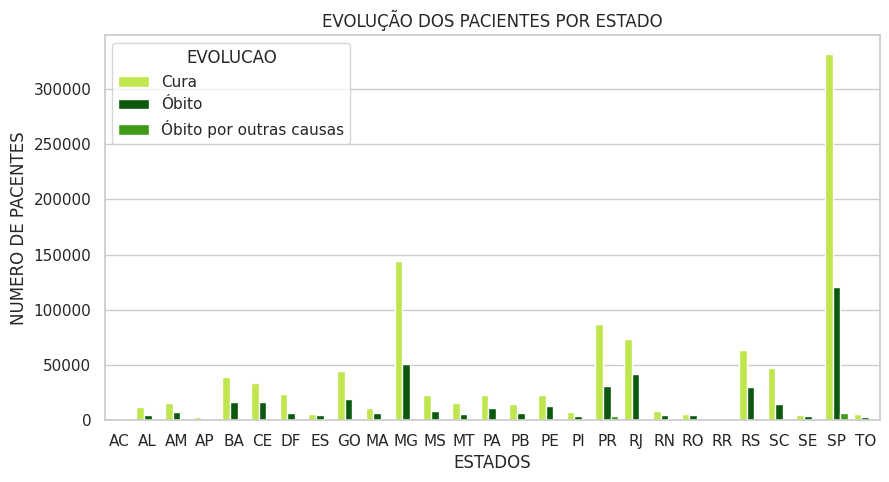

In [ ]:


# Contagem de ocorrências de cada combinação de categorias
counts = df.groupby(['EVOLUCAO', 'SG_UF']).size().reset_index(name='counts')

# Criar o gráfico de barras agrupadas

plt.figure(figsize=(10, 5))
sns.barplot(data=counts, x='SG_UF', y='counts', hue='EVOLUCAO', palette=["#ccff33", "#006400", "#38b000"])

# Personalizar o gráfico
plt.title('EVOLUÇÃO DOS PACIENTES POR ESTADO')
plt.xlabel('ESTADOS')
plt.ylabel('NUMERO DE PACENTES')

# Mostrar o gráfico
plt.show()


Prescrição: Apear de SP ter sido o maior estado com casos de sindromes respiratorias, mas com relação a evolução dos pacientes ele foi o estado que mais teve pacientes que se curou em vista dos outros estados.  De acordo com a revista CNN São Paulo foi o primeiro estado a começar a campanha de vacinação contra a Covid-19  e também é o primeiro a atingir o marco de em 92,72% dos adultos vacinados. Os estados brasileiro poderia se espalhar nas campanhas de vacinação de São Paulo para que tambem possam atingir o marco de ter quase 100% da populaçao adulta vacinada.

Referencia: https://www.cnnbrasil.com.br/saude/dois-estados-tem-mais-de-90-da-populacao-adulta-completamente-imunizada/

# EVOLUÇÃO DE PACIENTES QUE PRECISARAM DE SUPORTE VENTILATÓRIO

In [ ]:
#CARREGANDO OS DADOS DE 2020
path = '/content/drive/MyDrive/datasets/INFLUD20-01-05-2023.csv'

df = pd.read_csv( path,
                 encoding='iso-8859-1',
    sep=';',
   usecols=[ 'EVOLUCAO', 'SUPORT_VEN']
)
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199937 entries, 0 to 1199936
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   SUPORT_VEN  1040011 non-null  float64
 1   EVOLUCAO    1116299 non-null  float64
dtypes: float64(2)
memory usage: 18.3 MB


In [ ]:
df = df[df["EVOLUCAO"] != 9]

In [ ]:
df = df[df["SUPORT_VEN"] != 9]

In [ ]:
df['EVOLUCAO'] = df['EVOLUCAO'].map({1:"Cura", 2: "Óbito",  3: "Óbito por outras causas",})

df_temp = df['SUPORT_VEN'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    1: "Sim, invasivo",
2:'Sim, não invasivo',
3:'Não',
9:'Ignorado'


})
df_temp

Sim, não invasivo    0.506841
Não                  0.312774
Sim, invasivo        0.180385
Name: SUPORT_VEN, dtype: float64

In [ ]:
df['SUPORT_VEN'] = df['SUPORT_VEN'].astype('category')


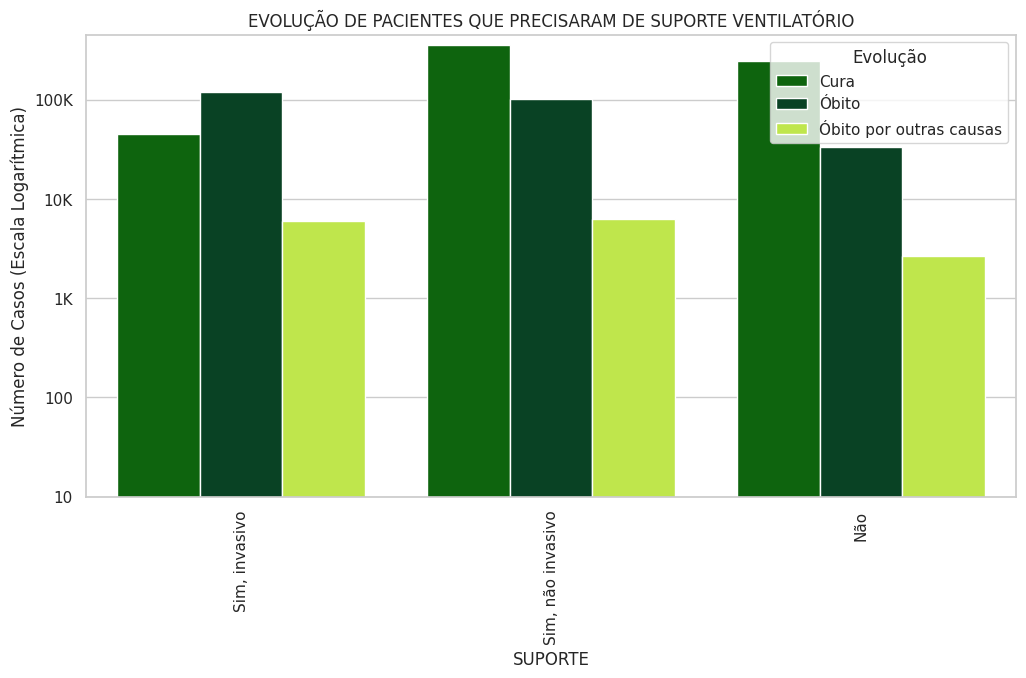

In [ ]:
# Substituir os valores na coluna 'SUPORT_VEN' pelo mapeamento desejado
df['SUPORT_VEN'] = df['SUPORT_VEN'].replace({
    1.0: "Sim, invasivo",
    2.0: "Sim, não invasivo",
    3.0: "Não",
    9.0: "Ignorado"
})

# Contagem de ocorrências de cada valor de EVOLUCAO por SUPORT_VEN
counts = df.groupby(['SUPORT_VEN', 'EVOLUCAO']).size().reset_index(name='counts')

# Criar um gráfico de barras empilhadas com cores personalizadas
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
colors = ["#007200", "#004b23", "#ccff33"]  # Cores personalizadas
ax = sns.barplot(data=counts, x='SUPORT_VEN', y='counts', hue='EVOLUCAO', palette=colors)

# Personalizar o gráfico
plt.title('EVOLUÇÃO DE PACIENTES QUE PRECISARAM DE SUPORTE VENTILATÓRIO')
plt.xlabel('SUPORTE')
plt.ylabel('Número de Casos (Escala Logarítmica)')
plt.yscale('log')
plt.legend(title='Evolução')
plt.xticks(rotation=90)

# Definir intervalos personalizados para os valores do eixo y (opcional)
yticks = [10, 100, 1000, 10000, 100000]
yticklabels = ['10', '100', '1K', '10K', '100K']
plt.yticks(yticks, yticklabels)

# Mostrar o gráfico
plt.show()


Prescrição: Ao analisar o grafico é notavel o despreparo dos profissionas de saúde no ano de 2020, pois os pacientes que precisavam de suporte ventilatorio ( ser entubados) teve em sua evolução mais taxa de obitos do que os que não precisaram de suporte.
É necessario que o governo faça uma capacitação  com esses agentes da saúde para que eles possam melhorar o atendimento ao paciente e assim conseguir diminuir essa taxa de mortalidade em pacientes que precisam de entubação.


# EVOLUÇÃO DE PACIENTES COM A COVID-19  COM IDADE DE 0 A 100 EM 2020 e 2022

Grafico de 2022

In [108]:
#CARREGANDO OS DADOS DE 2021
path = '/content/drive/MyDrive/datasets/INFLUD22-03-04-2023.csv'

df = pd.read_csv( path,
                 encoding='iso-8859-1',
    sep=';',
   usecols=[ 'VACINA_COV', 'NU_IDADE_N','CLASSI_FIN']
)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NU_IDADE_N  557476 non-null  int64  
 1   CLASSI_FIN  524837 non-null  float64
 2   VACINA_COV  556568 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.8 MB


In [109]:
df = df[df["CLASSI_FIN"] ==5]

In [110]:

df = df[df["VACINA_COV"]!=9]

In [111]:
df['VACINA_COV'] = df['VACINA_COV'].map({1:"Sim", 2: "Não"})


df_temp = df['CLASSI_FIN'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
1: "SRAG por influenza",
    2: "SRAG por outro vírus respiratório",
    3: "SRAG por outro agente etiológico",
    4: "SRAG não especificado",
    5: "SRAG por COVID-19"
})
df_temp

SRAG por COVID-19    1.0
Name: CLASSI_FIN, dtype: float64

<ipython-input-112-b76d4b95b3c8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['CLASSI_FIN'] = df_filtrado['CLASSI_FIN'].replace({


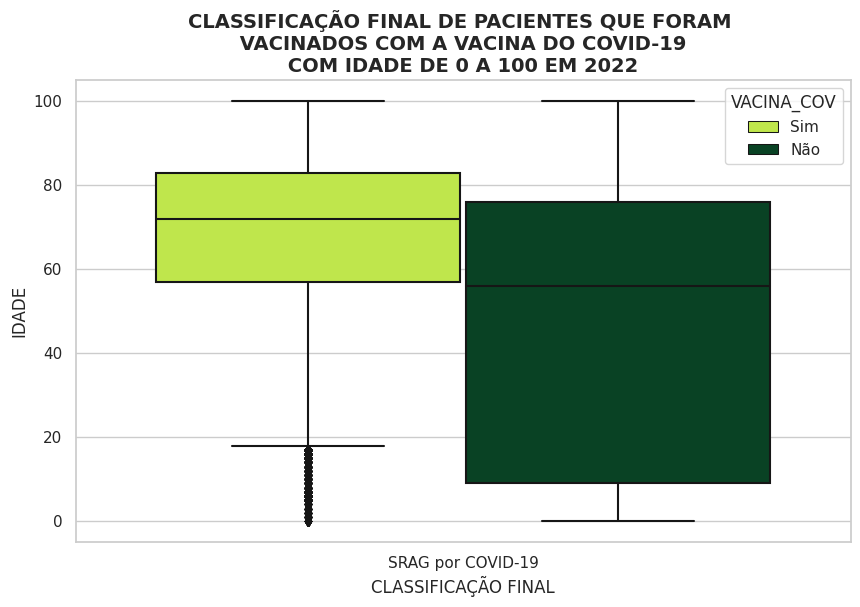

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir os limites de idade para filtragem
idade_min = 0
idade_max = 100

# Filtrar o DataFrame com base no intervalo de idade
df_filtrado = df[(df['NU_IDADE_N'] >= idade_min) & (df['NU_IDADE_N'] <= idade_max)]

# Substituir os valores na coluna 'CLASSI_FIN' pelo mapeamento desejado
df_filtrado['CLASSI_FIN'] = df_filtrado['CLASSI_FIN'].replace({
    1: "SRAG por influenza",
    2: "SRAG por outro vírus respiratório",
    3: "SRAG por outro agente etiológico",
    4: "SRAG não especificado",
    5: "SRAG por COVID-19"
})

# Configurar o estilo e a paleta de cores do Seaborn
sns.set_theme(style="whitegrid", palette="muted")
colors = ["#ccff33", '#004b23', '#008000']

# Plotar o gráfico de boxplot usando as colunas filtradas
plt.figure(figsize=(10, 6))
sns.boxplot(x="CLASSI_FIN", y="NU_IDADE_N", hue="VACINA_COV", data=df_filtrado, palette=colors)

# Personalizar o gráfico
plt.ylabel("IDADE")
plt.xlabel("CLASSIFICAÇÃO FINAL")
plt.title("CLASSIFICAÇÃO FINAL DE PACIENTES QUE FORAM \n VACINADOS COM A VACINA DO COVID-19 \n COM IDADE DE 0 A 100 EM 2022 ", fontweight="bold", fontsize=14)
plt.xticks(rotation=0)

# Mostrar o gráfico
plt.show()


PRESCRIÇÃO: Ao analisar o grafico é perceptivel que em 2022 com a campanha da vacinação contra o covid-19, a taxa de casos de covid na população vacinada é bem menor em relação a população não vacinada e ainda tem casos é raros nos jovens de 0 a 20 anos. Isso sigifica que a vacina está funcionado e a tendencia é que continue a diminuir. Para que isso ocorra o governo deve promover ainda mais suas campanhas de vacinação, poderia acontecer por meio de campanhas de conscientização, parcerias com profissionais de saúde e líderes comunitários, locais de vacinação acessíveis e campanhas direcionadas para grupos maiores de riscos e pessoas que tem hesitação em relação a vacinação,